In [4]:
# Code source: Sebastian Curi and Andreas Krause.

# Python Notebook Commands
%matplotlib inline
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

# Numerical Libraries
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 5)  # Change this if figures look ugly. 

# IPython Libraries
import IPython
import ipywidgets
from ipywidgets import interact, interactive, interact_manual


# sklearn library
import sklearn
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# Custom Libraries
from utilities import plot_helpers


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Effect of regularization coefficient on model parameters

Here, we generate data with 10 variables and vary the regularization parameter from $10^{-6}$ to $10^6$ and see how the optimal parameters of the regressors vary with the regularization parameter.

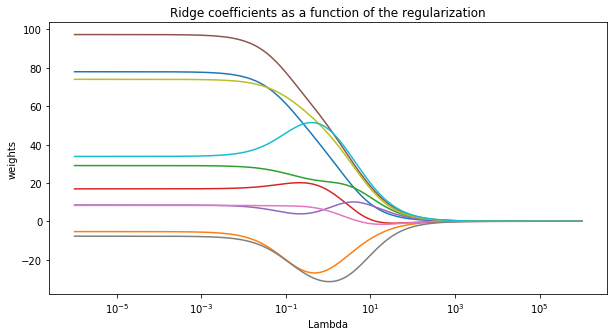

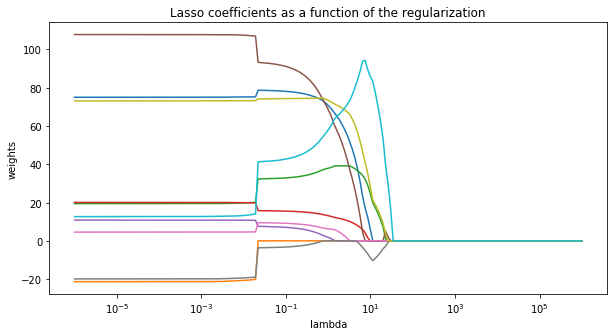

In [5]:
X, y, w = make_regression(n_samples=10, n_features=10, coef=True, random_state=1, bias=3.5)
clfs = dict(ridge=Ridge(), lasso=Lasso())

alphas = np.logspace(-6, 6, 200)
coefs = dict(ridge=[], lasso=[])
for a in alphas:
    for name, clf in clfs.items():
        clf.set_params(alpha=a, max_iter=10000)
        clf.fit(X, y)
        coefs[name].append(clf.coef_)

fig = plt.figure(1)
plt.plot(alphas, coefs['ridge'])
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

fig = plt.figure(2)
plt.plot(alphas, coefs['lasso'])
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

# A model with high capacity e.g. polynomials with high degree also have to be regularized. 



In [6]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def bias_variance_to(n_samples, degree, noise):
    np.random.seed(0)

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * noise

    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=True)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degree, -scores.mean(), scores.std()))
    plt.show()
    
interact(bias_variance_to, 
        n_samples=ipywidgets.IntSlider(value=30,
                                         min=30,
                                         max=300,
                                         step=1,
                                         description='Number of samples:',
                                         style={'description_width': 'initial'},
                                         continuous_update=False),
        degree=ipywidgets.IntSlider(value=1,
                                         min=1,
                                         max=15,
                                         step=1,
                                         description='Polynomial Degree:',
                                         style={'description_width': 'initial'},
                                         continuous_update=False),
         noise=ipywidgets.FloatSlider(value=0.1,
                                      min=0,
                                      max=1,
                                      step=0.1,
                                      readout_format='.1f',
                                      description='Noise level:',
                                      style={'description_width': 'initial'},
                                      continuous_update=False),);

interactive(children=(IntSlider(value=30, continuous_update=False, description='Number of samples:', max=300, …

In [7]:
def bias_variance_degree(noise):
    n_samples = 300
    np.random.seed(0)
    score = []
    
    degrees = np.arange(1, 10, 1)
    for degree in degrees:
        X = np.sort(np.random.rand(n_samples))
        y = true_fun(X) + np.random.randn(n_samples) * noise

        polynomial_features = PolynomialFeatures(degree=degree,
                                                 include_bias=True)
        linear_regression = LinearRegression()
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                             ("linear_regression", linear_regression)])
        pipeline.fit(X[:, np.newaxis], y)

        # Evaluate the models using crossvalidation
        scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                                 scoring="neg_mean_squared_error", cv=10)

        score.append(-scores.mean())

    plt.plot(degrees, score)
    plt.ylabel('MSE')
    plt.xlabel('Polynomial degree (Model Complexity)')
    plt.ylim([0, 2])
    plt.show()
    
interact(bias_variance_degree,
         noise=ipywidgets.FloatSlider(value=0.1,
                                      min=0,
                                      max=1,
                                      step=0.1,
                                      readout_format='.1f',
                                      description='Noise level:',
                                      style={'description_width': 'initial'},
                                      continuous_update=False),);

interactive(children=(FloatSlider(value=0.1, continuous_update=False, description='Noise level:', max=1.0, rea…